In [67]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

### 1. Load the training and testing dataset provided with this lab and join the Kaggle competition. (1 point)

In [68]:
x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")
x_test = pd.read_csv("x_test.csv")
display(x_train.head())
display(y_train.head())

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92


,index,target
0,17007,0.0
1,631,1.0
2,669,0.0
3,8949,0.0
4,2341,0.0


In [69]:
# Data Description: The dataset contains information about people’s jobs such as their demographic information etc. 
# and the target variable is to predict whether the person is
# looking for a job change or not, the dataset is imbalanced. There are 14,368 rows in the
# training set and 4790 rows in the testing set. 

# The columns in the dataset are as follows:
# • index: Unique ID for candidate
# • city: City code
# • city_ development _index: Development index of the city (scaled)
# • gender: Gender of candidate
# • relevent_experience: Relevant experience of candidate
# • enrolled_university: Type of University course enrolled if any
# • education_level: Education level of candidate
# • major_discipline : Education major discipline of candidate
# • experience: Candidate total experience in years
# • company_size: No of employees in current employer's company
# • company_type : Type of current employer
# • lastnewjob: Difference in years between previous job and current job
# • training_hours: training hours completed
# • target: 0 – Not looking for job change, 1 – Looking for a job change

### 2. Explain in your own words what is NOIR classification of data. (2 points)

NOIR stands for Nominal, Ordinal, Interval and Ratio 
1. Nominal data is data which consists of unique values. Fo example colums like names, IDs or phone numbers. Operations like mode are nominal.
2. Ordinal data is data which consists of unique value and are ordered. The order makes sense. For example, income can be categorized as low income, middle income or high income. Operations like median are Ordinal.
3. Interval data is data which consists of unique values, ordered and the intervals between them are distinguishable and meaningful. For example temperatures in Celsius , grades. Operations like mean is Interval.
4. Ratio data is data which consists of unique values, ordered, differences between intervals are meaningful and it can reach an absolute zero. For example weight,height, temperature in Kelvin. Operations like Harmonic mean and Geometric mean are ratio.

### 3. Classify the given dataset features into NOIR categories. (2 points)

In [70]:
x_train.head()

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92


1. Nominal: index,city,gender,major_discipline,company_type,relevent_experience
2. Ordinal: enrolled_university,education_level,experience
3. Interval: company_size,last_new_job,training_hours
4. Ratio:city_development_index

### 4. Summarize the dataset: (10 points)

a. Number of columns and rows present (1 point) <br/>

In [71]:
print('Number of rows : ',len(x_train))
print('Number of columns: ',len(x_train.columns))

print('Number of rows : ',len(y_train))
print('Number of columns: ',len(y_train.columns))

Number of rows :  14368
Number of columns:  13
Number of rows :  14368
Number of columns:  2


b. Min, max, avg, std dev etc. stats for continuous features (hint: use pandas describe function) (1 point)<br/>

In [72]:
x_train.describe()

,index,city_development_index,training_hours
count,14368.000000,14368.000000,14368.000000
mean,9634.231765,0.828252,65.396645
std,5522.764568,0.123419,60.277583
min,0.000000,0.448000,1.000000
25%,4840.750000,0.738000,23.000000
50%,9693.500000,0.899000,47.000000
75%,14405.250000,0.920000,88.000000
max,19157.000000,0.949000,336.000000


c. Number of unique values for categorical features (1 point)

In [73]:
print('Number of unique values in gender : ',x_train['gender'].nunique())
print('Number of unique values in city : ',x_train['city'].nunique())
print('Number of unique values in relevent_experience : ',x_train['relevent_experience'].nunique())
print('Number of unique values in enrolled_university : ',x_train['enrolled_university'].nunique())
print('Number of unique values in education_level : ',x_train['education_level'].nunique())
print('Number of unique values in major_discipline : ',x_train['major_discipline'].nunique())
print('Number of unique values in company_size : ',x_train['company_size'].nunique())
print('Number of unique values in company_type : ',x_train['company_type'].nunique())
print('Number of unique values in experience : ',x_train['experience'].nunique())

Number of unique values in gender :  3
Number of unique values in city :  123
Number of unique values in relevent_experience :  2
Number of unique values in enrolled_university :  3
Number of unique values in education_level :  5
Number of unique values in major_discipline :  6
Number of unique values in company_size :  8
Number of unique values in company_type :  6
Number of unique values in experience :  22


d. Number of nulls and Nans in each column (1 point)

In [74]:
data = x_train.merge(y_train, on='index', how='left')
data_m = x_train.merge(y_train, on='index', how='left')
display(data)

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22,1.0
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91,0.0
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,16304,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,157,0.0
14364,79,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,2,<10,Early Stage Startup,1,4,0.0
14365,12119,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Pvt Ltd,NaN,34,0.0
14366,14147,city_10,0.895,Male,Has relevent experience,no_enrollment,Masters,STEM,15,100-500,Public Sector,1,4,0.0


In [75]:
x_train.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                    3393
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
dtype: int64

In [76]:
# First filling missing categorical variables with mode and applying label encoding so we can move to numerical variables
for feature in ['gender','enrolled_university','education_level','major_discipline','company_size','company_type','experience','last_new_job']:
    data_m[feature].fillna(data_m[feature].mode()[0], inplace=True)
data_m.head()


,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,no_enrollment,High School,STEM,3,50-99,Pvt Ltd,1,22,1.0
2,669,city_114,0.926,Male,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,50-99,Pvt Ltd,4,91,0.0
4,2341,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0


e. Visualize distribution of each feature using graphs (6 points)

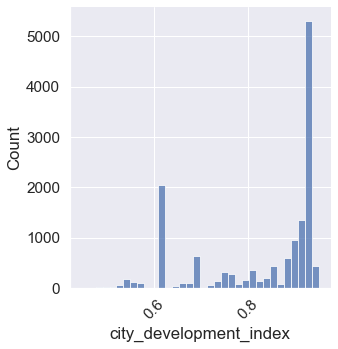

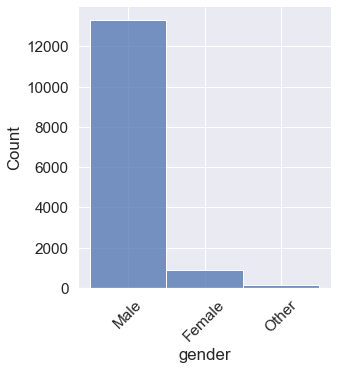

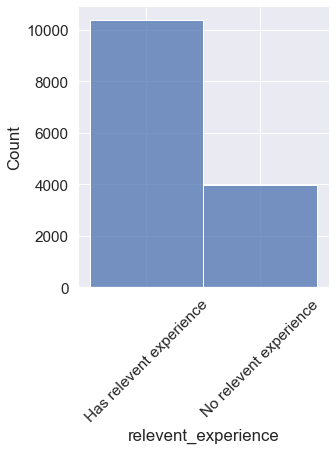

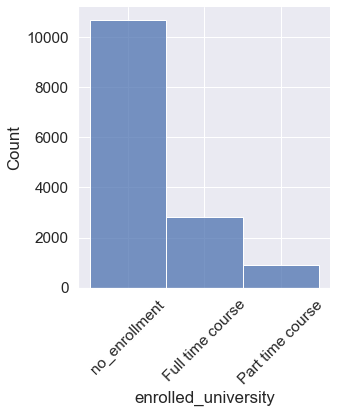

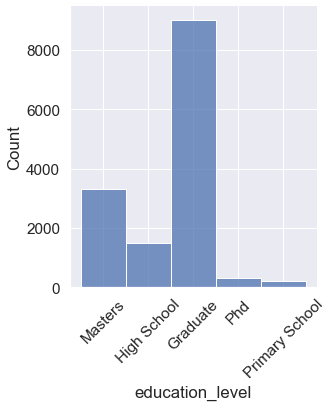

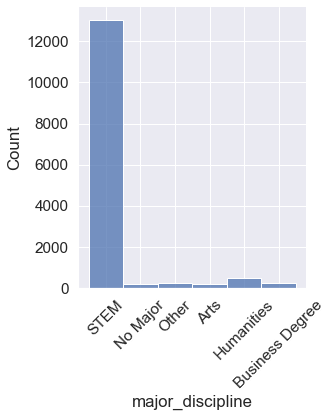

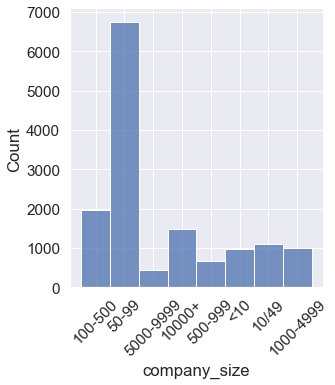

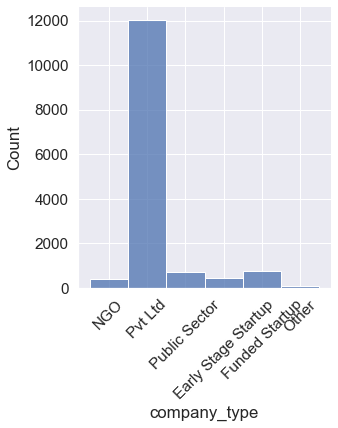

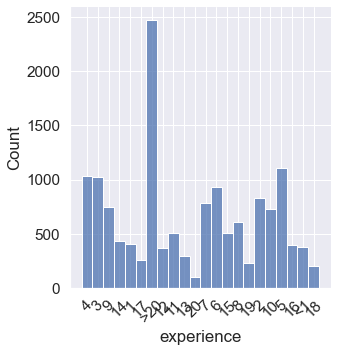

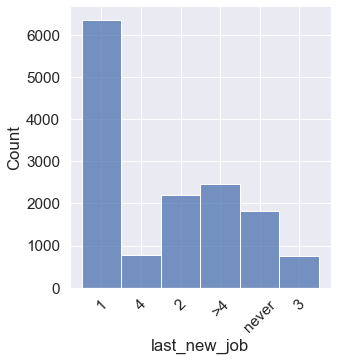

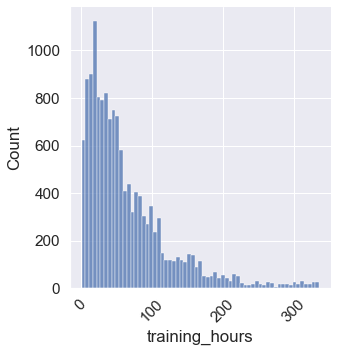

In [77]:
for feature in ['city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type','experience','last_new_job','training_hours']:
    sns.displot(data_m,x=feature)
    plt.xticks(rotation=45)


<AxesSubplot:>

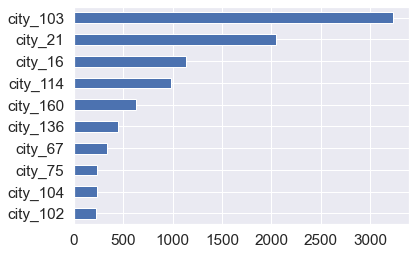

In [78]:
data.city.value_counts().head(10).sort_values().plot(kind = 'barh')

### 5. Visualize the relationship of each feature with target variable 
(hint: create density plots
for continuous features and cross tables for categorical features) (6 points)

In [79]:
x_train.head()

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92


1. Continuous : index,city,city_development_index,training_hours
2. Categorical :gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size, company_type,experience,last_new_job


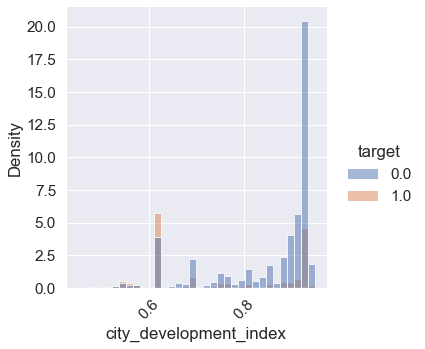

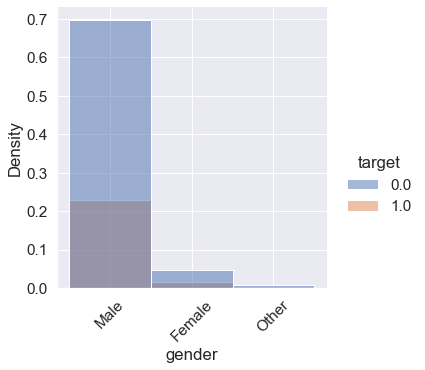

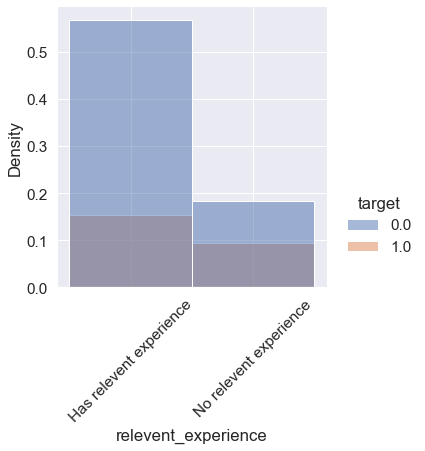

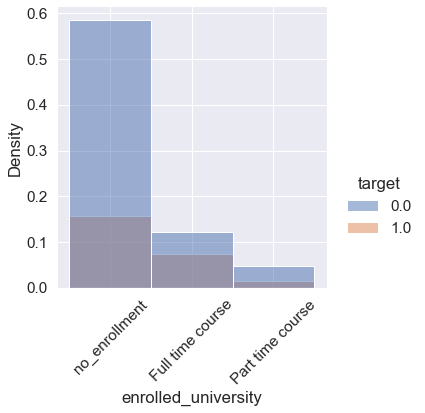

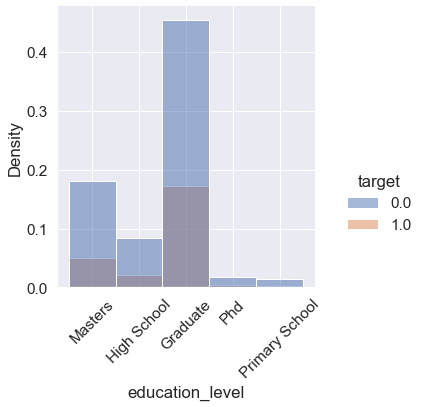

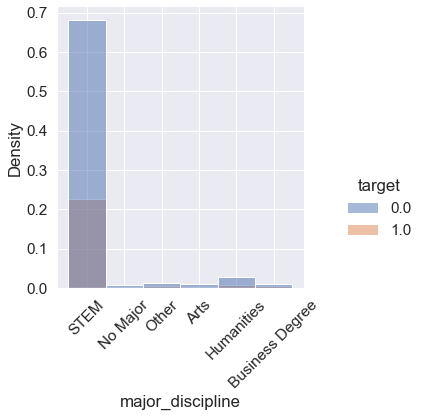

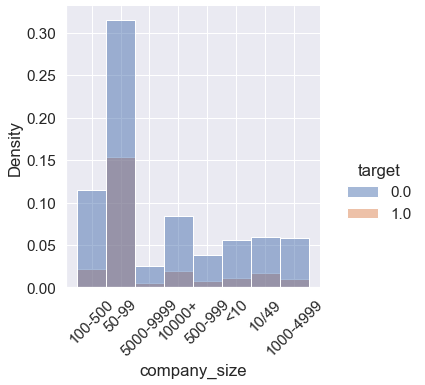

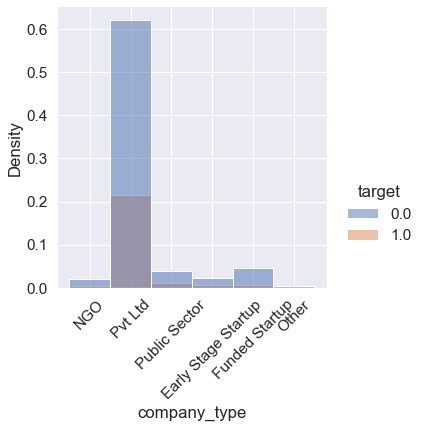

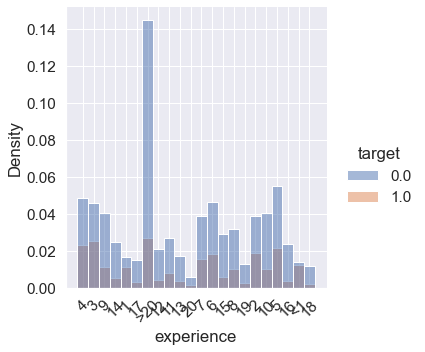

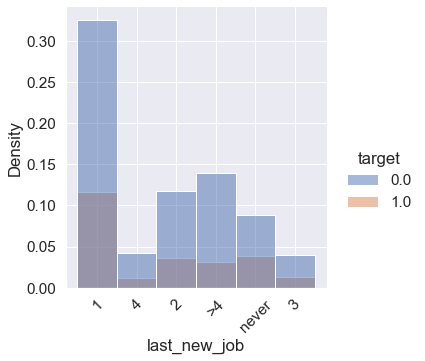

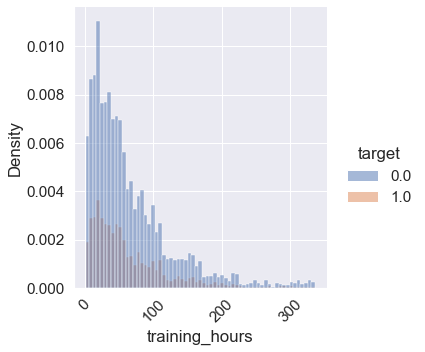

In [80]:

#sns.displot(data,x='city_development_index',hue='target',stat='density',element = 'step')

for feature in ['city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type','experience','last_new_job','training_hours']:
    sns.displot(data_m,x=feature,hue='target',stat='density')
    plt.xticks(rotation=45)


### 6. Handle missing values: Use any three methods to handle missing values. (6 points)

#### 6.1 First filling missing categorical variables with mode 

In [81]:

data_mode = data
for feature in data_mode.columns[1:]:
    if feature in ['gender','enrolled_university','education_level','major_discipline','company_size','company_type','experience','relevent_experience','last_new_job']:
        data_mode[feature] = data_mode[feature].fillna(data_mode[feature].mode()[0])
    elif feature =='city':
        continue
    else:
        data_mode[feature] = data_mode[feature].fillna(data_mode[feature].mean())
data_mode.head()


,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,no_enrollment,High School,STEM,3,50-99,Pvt Ltd,1,22,1.0
2,669,city_114,0.926,Male,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,50-99,Pvt Ltd,4,91,0.0
4,2341,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0


#### 6.2 Using drop function

In [82]:
 data_drop = data.dropna(axis = 0, how= 'any')
print(data_drop.shape)
data_drop.head()

(14368, 14)


,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,no_enrollment,High School,STEM,3,50-99,Pvt Ltd,1,22,1.0
2,669,city_114,0.926,Male,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,50-99,Pvt Ltd,4,91,0.0
4,2341,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0


##### 6.3 Imputing data

In [83]:
data_impute = data
data_impute.head()

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,no_enrollment,High School,STEM,3,50-99,Pvt Ltd,1,22,1.0
2,669,city_114,0.926,Male,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,50-99,Pvt Ltd,4,91,0.0
4,2341,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0


In [84]:
def edu_level(x):
    if x=='Primary School' :   return 1 
    if x=='Graduate'       :   return 2
    if x=='Masters'        :   return 3 
    if x=='High School'    :   return 4 
    if x=='Phd'            :   return 5 
    
def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    

def experience(x):
    if x=='<1'      :   return 1
    if x=='1'       :   return 2 
    if x=='2'       :   return 3 
    if x=='3'       :   return 4 
    if x=='4'       :   return 5 
    if x=='5'       :   return 6
    if x=='6'       :   return 7
    if x=='7'       :   return 8
    if x=='8'       :   return 9 
    if x=='9'       :   return 10 
    if x=='10'      :   return 11 
    if x=='11'      :   return 12
    if x=='12'      :   return 13
    if x=='13'      :   return 14 
    if x=='14'      :   return 15 
    if x=='15'      :   return 16 
    if x=='16'      :   return 17
    if x=='17'      :   return 18
    if x=='18'      :   return 19
    if x=='19'      :   return 20 
    if x=='20'      :   return 21 
    if x=='>20'     :   return 22 
    
def company_s(x):
    if x=='<10'          :   return 1
    if x=='10/49'        :   return 2 
    if x=='100-500'      :   return 3 
    if x=='1000-4999'    :   return 4 
    if x=='10000+'       :   return 5 
    if x=='50-99'        :   return 6 
    if x=='500-999'      :   return 7 
    if x=='5000-9999'    :   return 8
    
def last_job(x):
    if x=='never'        :   return 1
    if x=='1'            :   return 2 
    if x=='2'            :   return 3 
    if x=='3'            :   return 4 
    if x=='4'            :   return 5 
    if x=='>4'           :   return 6 

In [85]:
display(data_impute.head())

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,no_enrollment,High School,STEM,3,50-99,Pvt Ltd,1,22,1.0
2,669,city_114,0.926,Male,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,50-99,Pvt Ltd,4,91,0.0
4,2341,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0


In [86]:

data_impute['relevent_experience'] = data_impute['relevent_experience'].apply(rel_experience)

data_impute['education_level'] = data_impute['education_level'].apply(edu_level)

data_impute['experience'] = data_impute['experience'].apply(experience)

data_impute['company_size'] = data_impute['company_size'].apply(company_s)

data_impute['last_new_job'] = data_impute['last_new_job'].apply(last_job)

data_impute

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,1,no_enrollment,3,STEM,5,3,NGO,2,22,0.0
1,631,city_94,0.698,Male,1,no_enrollment,4,STEM,4,6,Pvt Ltd,2,22,1.0
2,669,city_114,0.926,Male,1,Full time course,3,STEM,10,6,Pvt Ltd,2,88,0.0
3,8949,city_114,0.926,Male,0,Full time course,2,STEM,15,6,Pvt Ltd,5,91,0.0
4,2341,city_16,0.910,Male,1,no_enrollment,2,STEM,2,8,Pvt Ltd,2,92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,16304,city_103,0.920,Male,1,no_enrollment,2,STEM,22,6,Pvt Ltd,6,157,0.0
14364,79,city_103,0.920,Female,1,no_enrollment,3,STEM,3,1,Early Stage Startup,2,4,0.0
14365,12119,city_21,0.624,Male,1,no_enrollment,3,STEM,2,6,Pvt Ltd,2,34,0.0
14366,14147,city_10,0.895,Male,1,no_enrollment,3,STEM,16,3,Public Sector,2,4,0.0


In [87]:
# Converting data so that KNN impute can work 
data_impute['city'] = data_impute['city'].str.replace('city_','')
data_impute['city'] = data_impute['city'].astype(int)
for feature in ['gender','enrolled_university','major_discipline','company_type']:
    data_impute[feature]=labelencoder.fit_transform(data_impute[feature])

#### 6.4 KNN Impute

In [88]:
data_knn_impute = data
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors = 4)
knn_imputer.fit(data_knn_impute)
num_cols = [col for col in data_knn_impute.columns if data_knn_impute[col].dtypes != 'O']
train_df_knn = pd.DataFrame(knn_imputer.transform(data_knn_impute),columns = num_cols)

#### 6.5 Label encoding

In [89]:
df = x_train.merge(y_train, on='index', how='left')

In [90]:
#Replacing the Nan values of the categorical values with mode of that column
#Label Encoding
df['city'] = df['city'].fillna(df['city'].value_counts().index[0])
CityLabelEncoder = LabelEncoder().fit(df['city'])
CityList = CityLabelEncoder.classes_
df['city'] = CityLabelEncoder.transform(df['city'])

df['company_type'] = df['company_type'].fillna(df['company_type'].value_counts().index[0])
CTypeLabelEncoder = LabelEncoder().fit(df['company_type'])
CTypeList = CTypeLabelEncoder.classes_
df['company_type'] = CTypeLabelEncoder.transform(df['company_type'])

df['company_size'].replace(['<10','10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+',],
                             ['Startup','Small','Small','Medium','Medium','Large','Large','Large'],inplace=True)
df['company_size'] = df['company_size'].fillna(df['company_size'].value_counts().index[0])
CSizeLabelEncoder = LabelEncoder().fit(df['company_size'])
CSizeList = CSizeLabelEncoder.classes_
df['company_size'] = CSizeLabelEncoder.transform(df['company_size'])

df['education_level'] = df['education_level'].fillna(df['education_level'].value_counts().index[0])
EduLabelEncoder = LabelEncoder().fit(df['education_level'])
EduList = EduLabelEncoder.classes_
df['education_level'] = EduLabelEncoder.transform(df['education_level'])

df['enrolled_university'] = df['enrolled_university'].fillna(df['enrolled_university'].value_counts().index[0])
UniLabelEncoder = LabelEncoder().fit(df['enrolled_university'])
UniList = UniLabelEncoder.classes_
df['enrolled_university'] = UniLabelEncoder.transform(df['enrolled_university'])

df['gender'] = df['gender'].fillna(df['gender'].value_counts().index[0])
GenderLabelEncoder = LabelEncoder().fit(df['gender'])
GenderList = GenderLabelEncoder.classes_
df['gender'] = GenderLabelEncoder.transform(df['gender'])

df['target'] = df['target'].fillna(df['target'].value_counts().index[0])

df['major_discipline'] = df['major_discipline'].fillna(df['major_discipline'].value_counts().index[0])
MajorLabelEncoder = LabelEncoder().fit(df['major_discipline'])
MajorList = MajorLabelEncoder.classes_
df['major_discipline'] = MajorLabelEncoder.transform(df['major_discipline'])

df['relevent_experience'] = df['relevent_experience'].fillna(df['relevent_experience'].value_counts().index[0])
ExpLabelEncoder = LabelEncoder().fit(df['relevent_experience'])
ExpList = ExpLabelEncoder.classes_
df['relevent_experience'] = ExpLabelEncoder.transform(df['relevent_experience'])

# The extreme values in the 'last_new_job' and 'experience' columns are set
df['last_new_job'].replace(['>4','never'],['4','0'],inplace=True)
df['last_new_job'].fillna(df['last_new_job'].value_counts().index[0],inplace=True)
df['last_new_job'] = [float(i) for i in df['last_new_job']]

df['experience'].replace(['>20','<1'],['20','1'],inplace=True)
df['experience'].fillna(df['experience'].value_counts().index[0],inplace=True)
df['experience'] = [float(i) for i in df['experience']]

df['training_hours'] = df['training_hours'].fillna(df['training_hours'].mean())
df['training_hours'] = [float(i) for i in df['training_hours']]
df['city_development_index'] = df['city_development_index'].fillna(df['city_development_index'].mean())

#Oversampling the minority labels - to reduce imbalance in the label count of each column in df
from imblearn.over_sampling import SMOTE
X_org = df[df.columns[:len(df.columns)-1]].to_numpy()
Y_org = df[df.columns[len(df.columns)-1]].to_numpy()
over = SMOTE(random_state=42)
X_n, Y_n = over.fit_resample(X_org,Y_org)

In [91]:
sns.set(font_scale=1.4)

#### Plot a heatmap

<AxesSubplot:>

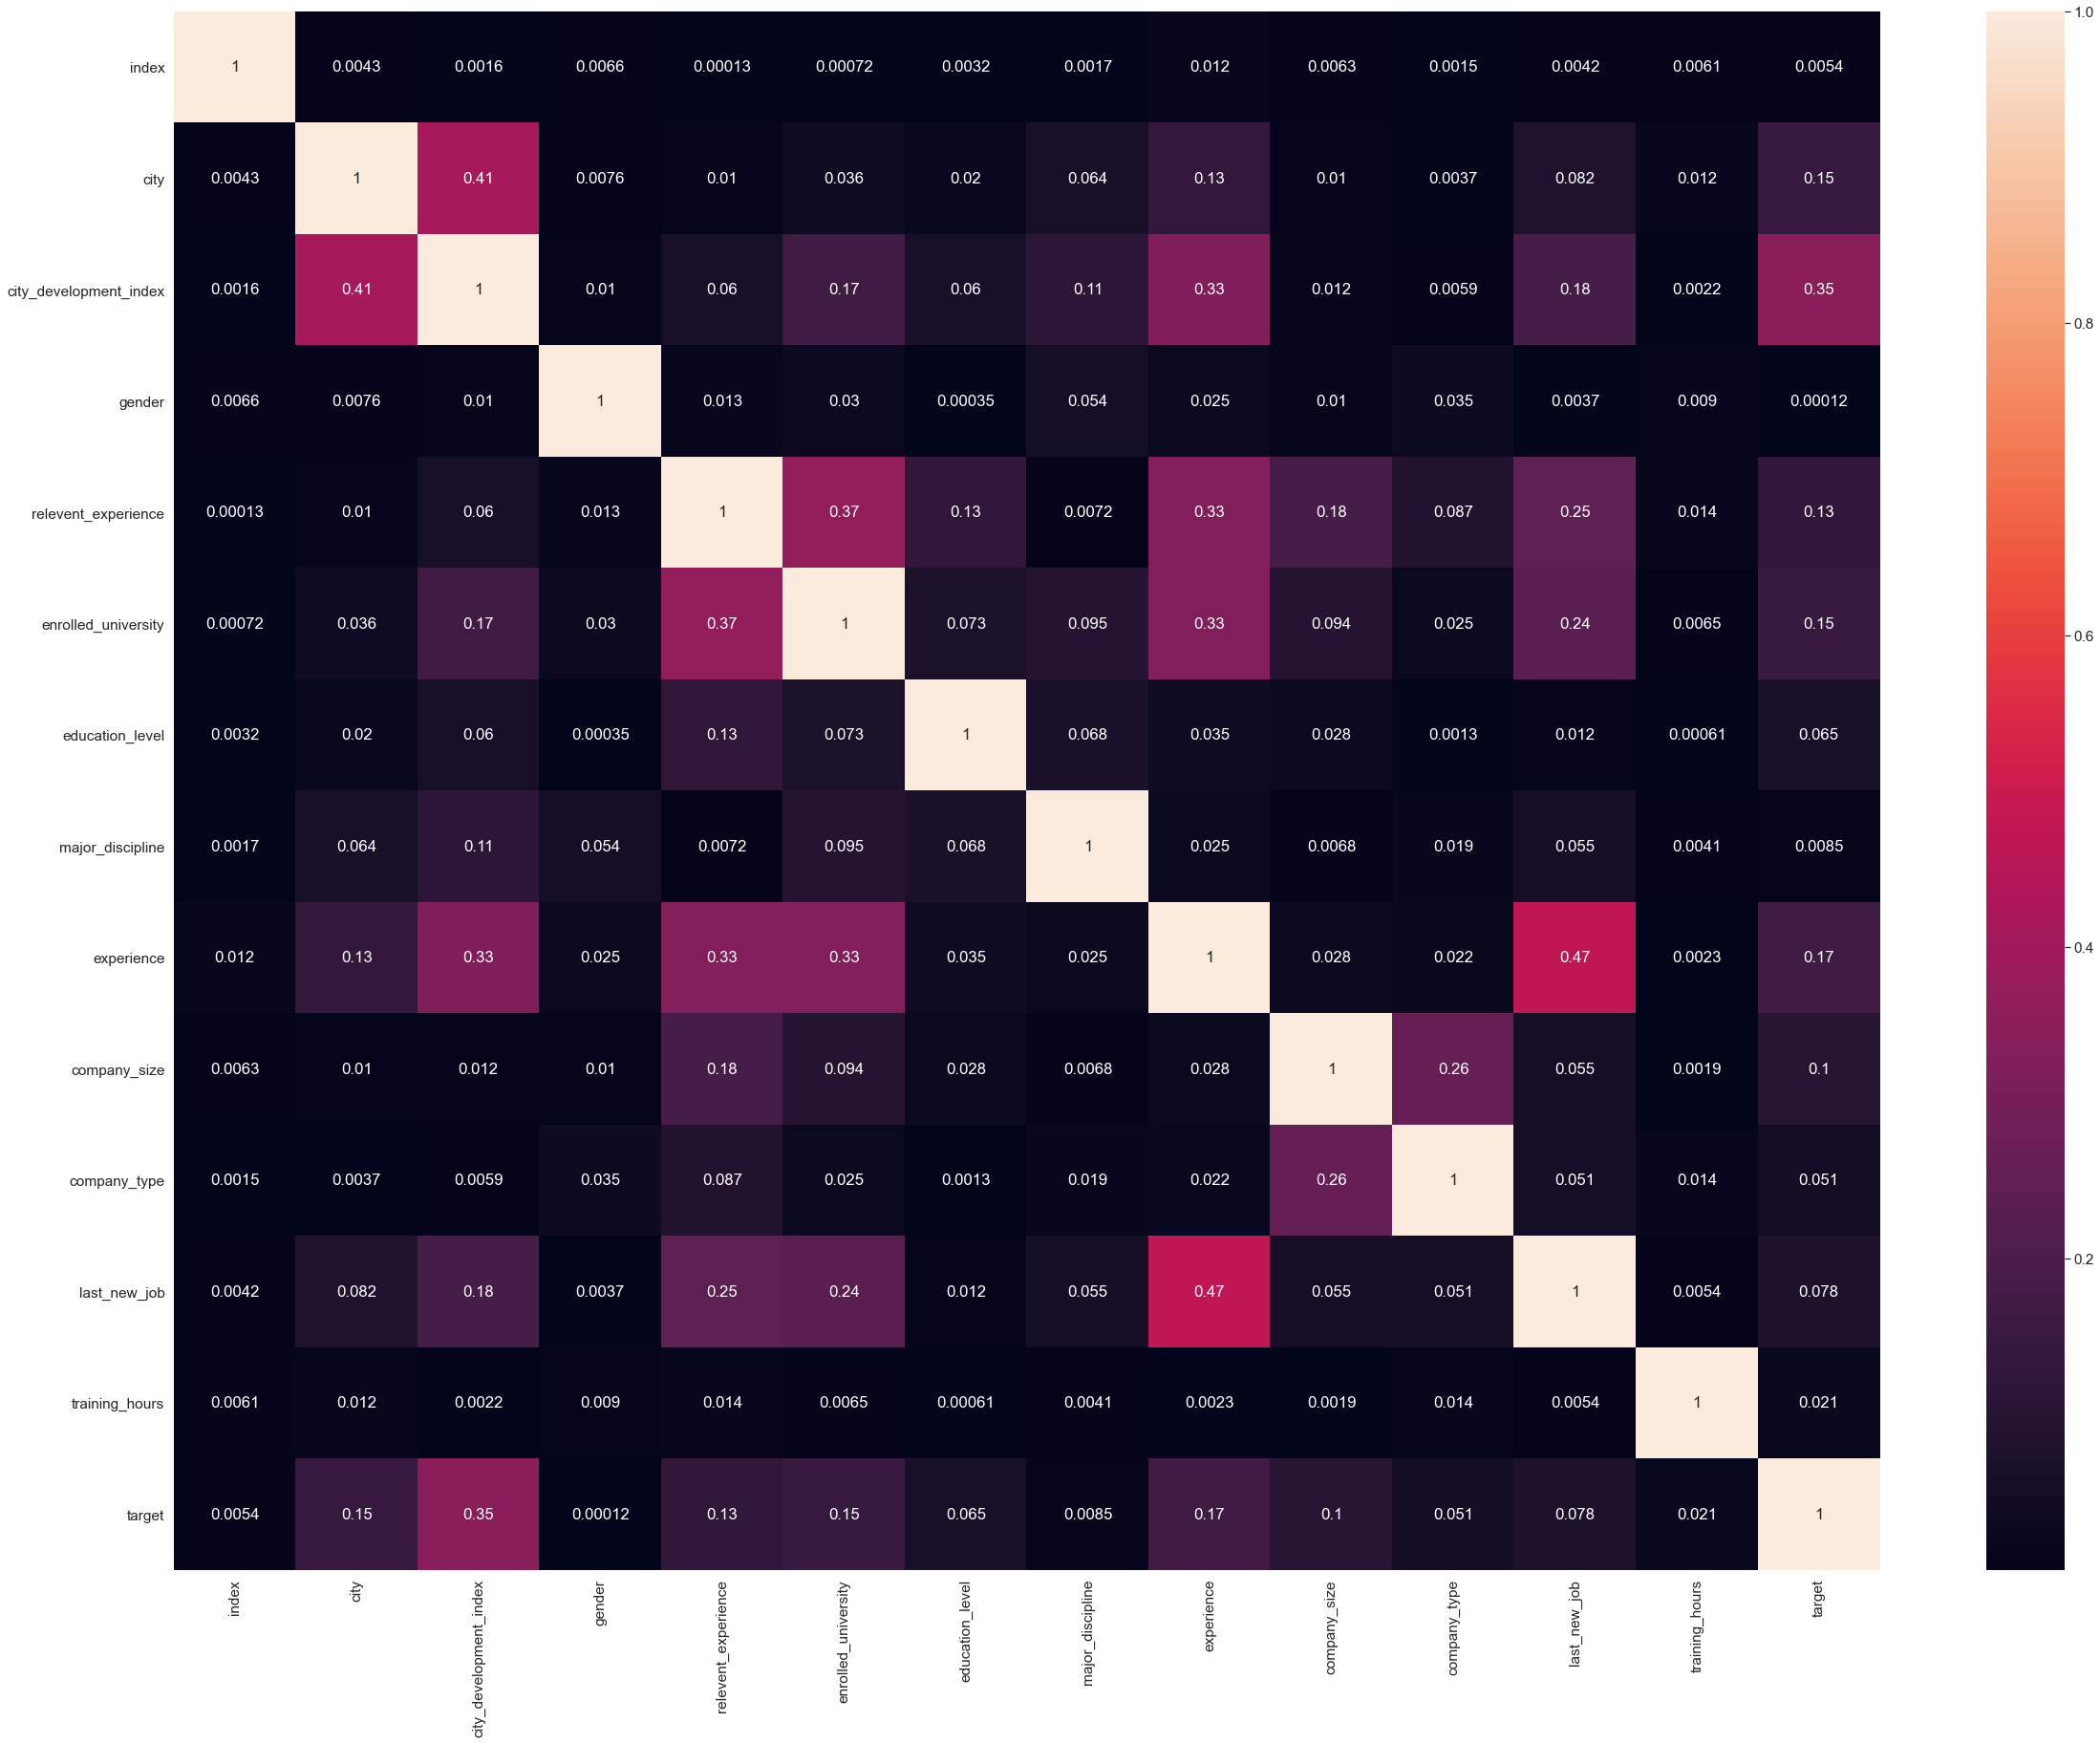

In [92]:
plt.figure(figsize = (40,30))
sns.heatmap(data.corr().abs(),annot = True)

### 7. Create new features using combinations / transformations of existing features (Optional) (0 points)

In [93]:
# feature engineering using domain knowledge
# Adding the new column experience index which combines city development index with experience
data_mode['exp_index'] = data_mode['city_development_index'].astype(int) * data_mode['experience']
data_impute['exp_index'] = data_impute['city_development_index'] * data_impute['experience'].astype(float)
data_knn_impute['exp_index'] = data_knn_impute['city_development_index'] * data_knn_impute['experience'].astype(float)

### 8. Scale the features for models that require scaling and perform required pre-processing (such as one hot encoding etc.) (5 points)

In [94]:
data_impute.head()


,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,exp_index
0,17007,61,0.913,1,1,2,3,5,5,3,2,2,22,0.0,4.565
1,631,94,0.698,1,1,2,4,5,4,6,5,2,22,1.0,2.792
2,669,114,0.926,1,1,0,3,5,10,6,5,2,88,0.0,9.260
3,8949,114,0.926,1,0,0,2,5,15,6,5,5,91,0.0,13.890
4,2341,16,0.910,1,1,2,2,5,2,8,5,2,92,0.0,1.820


In [95]:
numerical_columns = ['training_hours','exp_index']
X_train1 = data_impute.drop('target',axis=1)
y_train1 = data_impute['target']
X_train1[numerical_columns] = MinMaxScaler().fit_transform(X_train1[numerical_columns])

In [96]:
numerical_columns = ['training_hours','exp_index']
X_train2 = data_mode.drop('target',axis=1)
y_train2 = data_mode['target']
X_train2[numerical_columns] = MinMaxScaler().fit_transform(X_train2[numerical_columns])

In [97]:
numerical_columns = ['training_hours']
X_train3 = data_drop.drop('target',axis=1)
y_train3 = data_drop['target']
X_train3[numerical_columns] = MinMaxScaler().fit_transform(X_train3[numerical_columns])

In [98]:
numerical_columns = ['training_hours']
X_train4 = data_knn_impute.drop('target',axis=1)
y_train4 = data_knn_impute['target']
X_train4[numerical_columns] = MinMaxScaler().fit_transform(X_train4[numerical_columns])

In [99]:
from sklearn.model_selection import train_test_split
X_traina, X_testa, y_traina, y_testa = train_test_split(X_train1, y_train1, test_size = 0.15, random_state=149)

X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_train2, y_train2, test_size = 0.15, random_state=149)

X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_train3, y_train3, test_size = 0.15, random_state=149)

X_traind, X_testd, y_traind, y_testd = train_test_split(X_train4, y_train4, test_size = 0.15, random_state=149)

X_traine, X_teste, y_traine, y_teste = train_test_split(X_n, Y_n, test_size = 0.15, random_state=149)



### 9. Explain the following terms in detail (9 points)

a. Pearson’s correlation (3 points)

The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.


The Pearson coefficient is a measure of the strength and direction of the linear association between two variables with no assumption of causality. The Pearson coefficient shows correlation, not causation.

Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

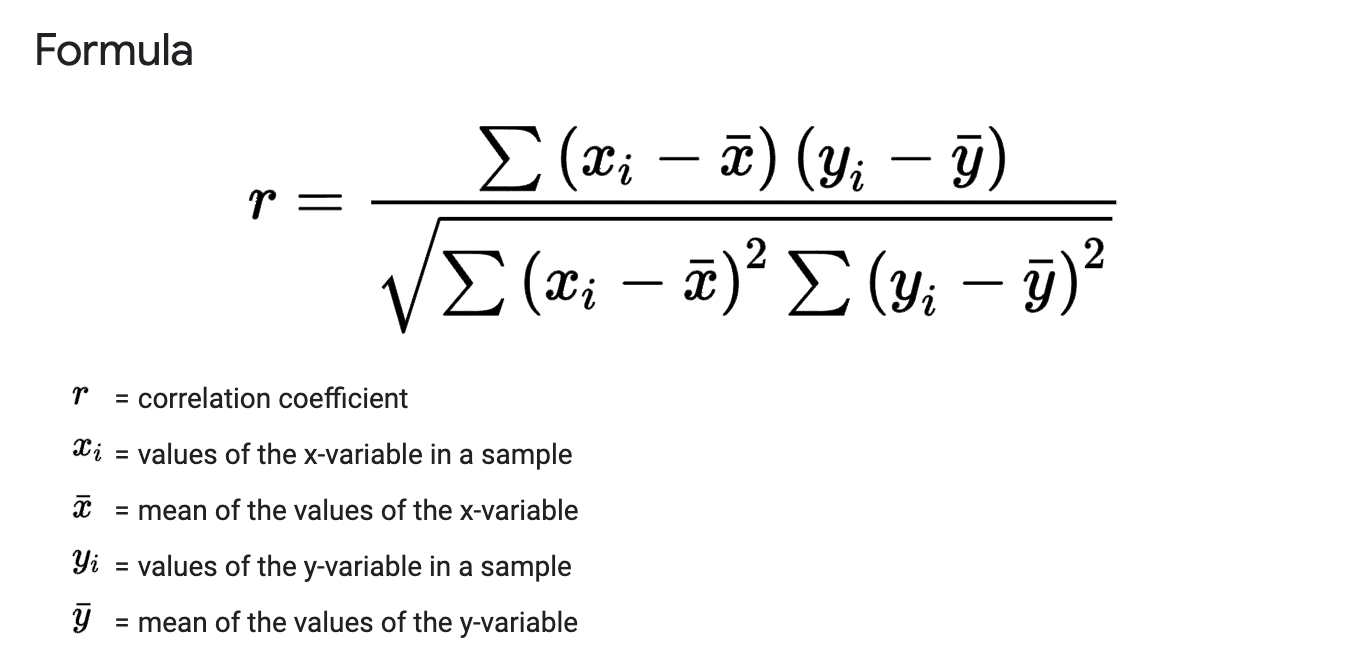

In [35]:
# from IPython.display import Image
# Image("image.png",width="500")

b. T – test (3 points)

T- Test :- A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features. It is mostly used when the data sets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances. T test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population.

T-test has 2 types :
1. one sampled t-test 
2. two-sampled t-test.

1. One sample t-test : The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test. Example: you have 10 ages and you are checking whether avg age is 30 or not.

2. Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test. Example: is there any association between week1 and week2 

c. Chi squared test (3 points)

A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof. Pearson's chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

In short, Chi square test is a statistical test which we used to compare/understand the relationship between our categorical features.

In Machine Learning we use this test as a feature selection technique.

Chi square is mostly used on categorical features, it can be used on numerical features but since the chi square test is based on frequencies the numerical data would need to be split into various categories like bins.

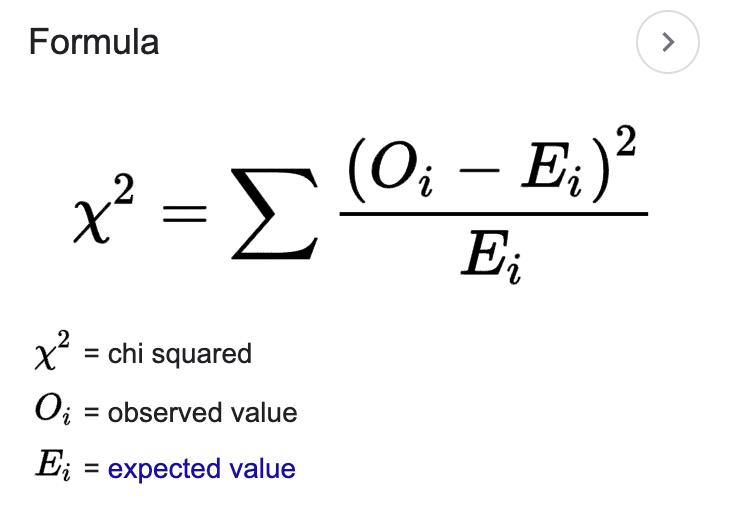

### 10. Perform Pearson correlation between continuous features and plot the heatmap of the correlation matrix. (3 points)

,city_development_index,training_hours,exp_index,target
0,0.913,22,4.565,0.0
1,0.698,22,2.792,1.0
2,0.926,88,9.260,0.0
3,0.926,91,13.890,0.0
4,0.910,92,1.820,0.0
...,...,...,...,...
14363,0.920,157,20.240,0.0
14364,0.920,4,2.760,0.0
14365,0.624,34,1.248,0.0
14366,0.895,4,14.320,0.0


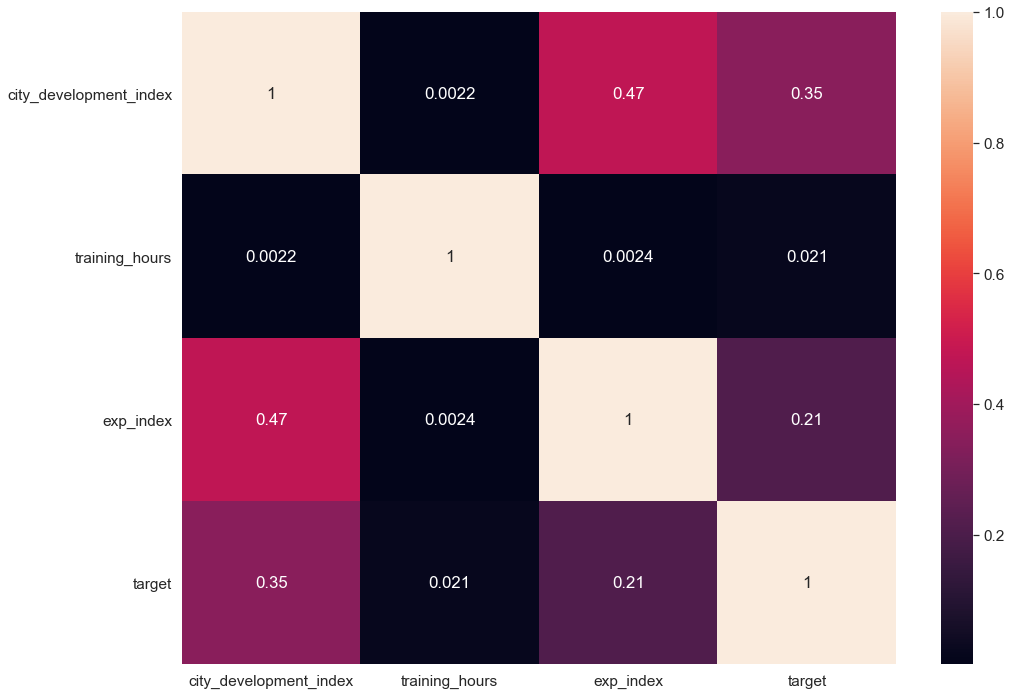

In [100]:
plt.figure(figsize = (16,12))
heat_pear = data_impute[['city_development_index','training_hours','exp_index','target']]
sns.heatmap(heat_pear.corr().abs(),annot = True)
heat_pear

,city_development_index,training_hours,exp_index,target
0,0.913,22,4.565,0.0
1,0.698,22,2.792,1.0
2,0.926,88,9.260,0.0
3,0.926,91,13.890,0.0
4,0.910,92,1.820,0.0
...,...,...,...,...
14363,0.920,157,20.240,0.0
14364,0.920,4,2.760,0.0
14365,0.624,34,1.248,0.0
14366,0.895,4,14.320,0.0


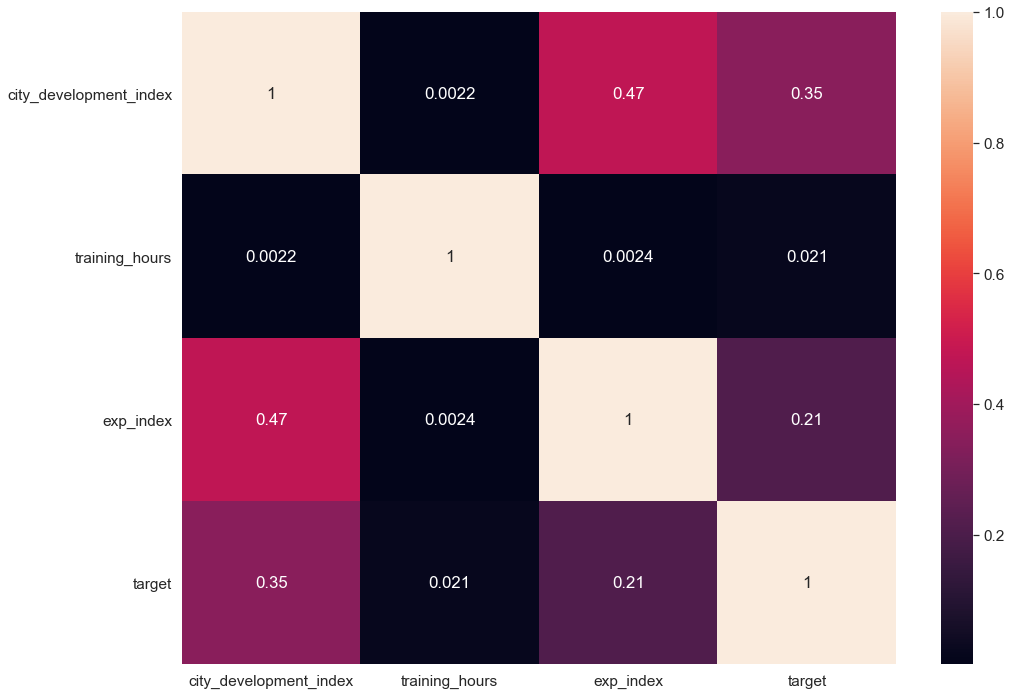

In [101]:
plt.figure(figsize = (16,12))
heat_pear_m = data_mode[['city_development_index','training_hours','exp_index','target']]
sns.heatmap(heat_pear_m.corr().abs(),annot = True)
heat_pear_m

### 11. Perform t test on continuous features after dividing them using target variable. (3 points)

In [102]:
from scipy.stats import ttest_ind
#data_impute[['city_development_index','training_hours','exp_index','target']]
cat1 = data_impute[data_impute['target']==0]
cat2 = data_impute[data_impute['target']==1]

display(ttest_ind(cat1['city_development_index'], cat2['city_development_index']))
display(ttest_ind(cat1['training_hours'], cat2['training_hours']))
display(ttest_ind(cat1['exp_index'], cat2['exp_index']))

Ttest_indResult(statistic=44.19885459032697, pvalue=0.0)

Ttest_indResult(statistic=2.5347161574845214, pvalue=0.011264369540078601)

Ttest_indResult(statistic=25.77824207663258, pvalue=2.751216958932377e-143)

In [103]:
from scipy.stats import ttest_ind
#data_impute[['city_development_index','training_hours','exp_index','target']]
cat3 = data_mode[data_impute['target']==0]
cat4 = data_mode[data_impute['target']==1]

display(ttest_ind(cat3['city_development_index'], cat4['city_development_index']))
display(ttest_ind(cat3['training_hours'], cat4['training_hours']))
display(ttest_ind(cat3['exp_index'], cat4['exp_index']))

Ttest_indResult(statistic=44.19885459032697, pvalue=0.0)

Ttest_indResult(statistic=2.5347161574845214, pvalue=0.011264369540078601)

Ttest_indResult(statistic=25.77824207663258, pvalue=2.751216958932377e-143)

### 12. Perform Chi squared test among categorical variables and with the target variable (3 points)

In [104]:
from scipy.stats import chi2_contingency,chisquare

chisquare(pd.crosstab(data_impute['target'],data_impute['gender']))

for feature in ['gender','enrolled_university','education_level','major_discipline','company_size','company_type','experience','relevent_experience','last_new_job']:
    print(feature,"  ",chisquare(pd.crosstab(data_impute['target'],data_impute[feature])))
    print()

    

gender    Power_divergenceResult(statistic=array([ 225.50984683, 3394.59239498,   30.53741497]), pvalue=array([5.68344058e-51, 0.00000000e+00, 3.27489367e-08]))

enrolled_university    Power_divergenceResult(statistic=array([ 158.79857651,  215.11111111, 3530.30174517]), pvalue=array([2.07086077e-36, 1.05397031e-48, 0.00000000e+00]))

education_level    Power_divergenceResult(statistic=array([ 123.95111111, 1827.15770212, 1091.45303534,  541.8       ,
        144.98064516]), pvalue=array([8.63450229e-029, 0.00000000e+000, 2.37971685e-239, 7.65327823e-120,
       2.16866466e-033]))

major_discipline    Power_divergenceResult(statistic=array([  67.82051282,   42.49557522,  155.63691684,   41.02325581,
         67.        , 3280.5560166 ]), pvalue=array([1.79076740e-16, 7.08423044e-11, 1.01627139e-35, 1.50428572e-10,
       2.71507132e-16, 0.00000000e+00]))

company_size    Power_divergenceResult(statistic=array([423.18219038, 329.05791855, 913.29659726, 485.52016129,
       573.94645248,

In [105]:
from scipy.stats import chi2_contingency,chisquare

#chisquare(pd.crosstab(data_mode['target'],data_mode['gender']))

# for feature in ['gender','enrolled_university','education_level','major_discipline','company_size','company_type','experience','relevent_experience','last_new_job']:
#     print(feature,"  ",chisquare(pd.crosstab(data_mode['target'],data_mode[feature])))
#     print()
    
print(chisquare(pd.crosstab(data_mode['experience'],data_mode['last_new_job'])))
    

Power_divergenceResult(statistic=array([1625.59471366, 2654.41074523, 1104.5721393 ,  544.05387648,
        744.85271318, 9303.43106954]), pvalue=array([0.00000000e+000, 0.00000000e+000, 1.40913046e-220, 8.91367944e-102,
       4.35538392e-144, 0.00000000e+000]))


### 13. Compare the features selected using visualization from question 5 and using the statistical tests from the previous three questions. (5 points)

From the visualizations we could see that city_development_index and experience have the highest correlation with target. The other features have very less correlation.

Now P-value is a set of criteria using  which either we accept or reject the experiments. P value is the smallest significant value at which the null hypothesis will be rejected. If my P value or significant value or alpha value falls in the region of gaussian normally distribution then only we are going to accept it else we need to reject the null hypothesis and accept the alternative hypothesis.It can be used for feature selection

To check Multicollinearity between Features, Pearson correlation test is used to validate if the independent quantitative variables aren’t correlated.

From Pearson's correlation test, we found out that experience, city_development_index and training hours has the highest correlation. Hence we proceed with those features.

T test shows that city_development_index and training hours has p value less than 0.05. Hence we can consider them.

Chi square test is a statistical test which we used to compare/understand the relationship between our categorical features. From our test , we can see that experience and last_new_job are highly correlated since the pvalue is less than 0.05 between them.

### 14. Explain the following terms: (6 points)

Running a regression model with many variables including irrelevant ones will lead to a needlessly complex model. Stepwise regression is a way of selecting important variables to get a simple and easily interpretable model.

a. Forward Selection (2 points)

Forward selection, which involves starting with no variables in the model, testing the addition of each variable using a chosen model fit criterion, adding the variable (if any) whose inclusion gives the most statistically significant improvement of the fit, and repeating this process until none improves the model to a statistically significant extent.

Forward stepwise selection (or forward selection) is a variable selection method which:

1. Begins with a model that contains no variables (called the Null Model)
2. Then starts adding the most significant variables one after the other
3. Until a pre-specified stopping rule is reached or until all the variables under consideration are included in the model

In order to fully understand how forward selection works, we need to know:

- How to determine the most significant variable at each step
- How to choose a stopping rule

1. Determine the most significant variable to add at each step
The most significant variable can be chosen so that, when added to the model:

+ It has the smallest p-value, or
+ It provides the highest increase in R2, or
+ It provides the highest drop in model RSS (Residuals Sum of Squares) compared to other predictors under consideration.


2. Choose a stopping rule
+ The stopping rule is satisfied when all remaining variables to consider have a p-value larger than some specified threshold, if added to the model.
+ When we reach this state, forward selection will terminate and return a model that only contains variables with p-values < threshold.

The threshold can be:

- A fixed value (for instance: 0.05 or 0.2 or 0.5)
- Determined by AIC (Akaike Information Criterion)
- Determined by BIC (Bayesian information criterion)

If we choose a fixed value, the threshold will be the same for all variables.
However, if we let AIC or BIC automatically determine the threshold, it will be different for each variable.


AIC chooses the threshold according to how many degrees of freedom the variable under consideration has.

BIC chooses the threshold according to the effective sample size n.


BIC is a more restrictive criterion than AIC and so yields smaller models. Therefore it is only recommended when working with large sample sizes — where the sample size (or number of events in case of logistic regression) exceeds 100 per independent variable =

b. Backward Elimination (2 points)

Backward elimination, which involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically significant loss of fit.

Backward stepwise selection (or backward elimination) is a variable selection method which:

1. Begins with a model that contains all variables under consideration (called the Full Model)
2. Then starts removing the least significant variables one after the other
3. Until a pre-specified stopping rule is reached or until no variable is left in the model

In order to understand how backward elimination works, we need to know how to determine:
- The least significant variable at each step
- The stopping rule

1. Determine the least significant variable to remove at each step
The least significant variable is a variable that:
- Has the highest p-value in the model, or
- Its elimination from the model causes the lowest drop in R2, or
- Its elimination from the model causes the lowest increase in RSS (Residuals Sum of Squares) compared to other predictors

2. Choose a stopping rule
- The stopping rule is satisfied when all remaining variables in the model have a p-value smaller than some pre-specified threshold.
- When we reach this state, backward elimination will terminate and return the current step’s model.

As with forward selection, the threshold can be:

- A fixed value (for instance: 0.05 or 0.2 or 0.5)
- Determined by AIC (Akaike Information Criterion)
- Determined by BIC (Bayesian information criterion)

c. Recursive feature elimination (2 points)

Recursive Feature Elimination, or RFE for short, is a feature selection algorithm.

- A machine learning dataset for classification or regression is comprised of rows and columns, like an excel spreadsheet. Rows are often referred to as samples and columns are referred to as features, e.g. features of an observation in a problem domain.

- Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

- RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.

- Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally. RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

- This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

- Features are scored either using the provided machine learning model (e.g. some algorithms like decision trees offer importance scores) or by using a statistical method.

### 15. Perform the above methods of feature reduction if you want. (Optional)

### 16. Train at least 5 different classification models on the final data (Perform hyper parameter tuning using a validation set for each of the model). (10 points)

### KNN

{'n_neighbors': 3, 'p': 1}
Accuracy score : 0.74
Recall score : 0.76
Precision score : 0.87
F1 score : 0.77


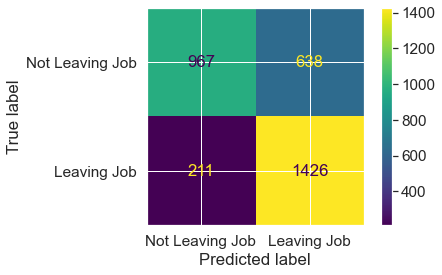

In [106]:
from sklearn.metrics import recall_score,precision_score,ConfusionMatrixDisplay,roc_auc_score,confusion_matrix,r2_score,f1_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
GridSearch = True
if GridSearch == True:
    param_grid = {'n_neighbors': np.arange(3,50), 'p':[1,2]}
    knn = KNeighborsClassifier()
    knn_cv = GridSearchCV(knn, param_grid, cv=10)
    knn_cv.fit(X_traine, y_traine)
    print(knn_cv.best_params_)
    knnpre = knn_cv.predict(X_teste)
    knncm = confusion_matrix(y_teste,knnpre)
    print("Accuracy score : {:.2f}".format(accuracy_score(knnpre,y_teste)))
    print("Recall score : {:.2f}".format(recall_score(knnpre,y_teste,average='macro',zero_division=True)))
    print("Precision score : {:.2f}".format(precision_score(knnpre,y_teste,zero_division = True)))
    print("F1 score : {:.2f}".format(f1_score(knnpre,y_teste,zero_division=True)))
    dis = ConfusionMatrixDisplay(knncm,display_labels=["Not Leaving Job","Leaving Job"])
    dis.plot()
    plt.show()

### Logistic Regression

{'C': 1, 'max_iter': 150, 'random_state': 42, 'solver': 'liblinear'}
Accuracy score : 0.72
Recall score : 0.72
Precision score : 0.69
F1 score : 0.71


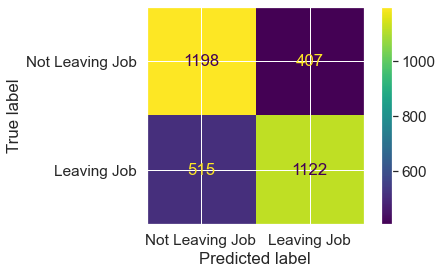

In [107]:
from sklearn.linear_model import LogisticRegression
if GridSearch == True:
    param_grid = {'C':[0.01, 0.1,0.2,0.25,0.3,0.4, 1, 2],'max_iter': [150,200,250, 300, 1000,1500], 'random_state':[42], 'solver':['liblinear'] } 
    lr = LogisticRegression()
    lr_cv = GridSearchCV(lr, param_grid, cv=10)
    lr_cv.fit(X_traine, y_traine)
    print(lr_cv.best_params_)
    lrpre=lr_cv.predict(X_teste)
    lrcm = confusion_matrix(y_teste,lrpre)
    print("Accuracy score : {:.2f}".format(accuracy_score(lrpre,y_teste)))
    print("Recall score : {:.2f}".format(recall_score(lrpre,y_teste,average='macro',zero_division=True)))
    print("Precision score : {:.2f}".format(precision_score(lrpre,y_teste,zero_division = True)))
    print("F1 score : {:.2f}".format(f1_score(lrpre,y_teste,zero_division=True)))
    dis = ConfusionMatrixDisplay(lrcm,display_labels=["Not Leaving Job","Leaving Job"])
    dis.plot()
    plt.show()

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
if GridSearch == True:
    param_grid = {'n_estimators':[25,50,60],'max_features': [3,4,5], 'max_depth':[5,6,7], 'min_samples_leaf':[8,9,10,11],'random_state':[1,42] } 
    rfb = RandomForestClassifier(n_jobs=-1)
    rf_cvb =  GridSearchCV(rfb, param_grid)
    rf_cvb.fit(X_trainb, y_trainb)
    print(rf_cvb.best_params_)
    rfpreb = rf_cvb.predict(X_testb)
    #{'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 8, 'n_estimators': 50, 'random_state': 42}

Accuracy score : 0.78
Recall score : 0.71
Precision score : 0.40
F1 score : 0.48


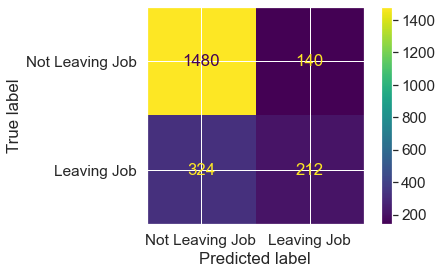

In [112]:
rfcmb = confusion_matrix(y_testb,rfpreb)
print("Accuracy score : {:.2f}".format(accuracy_score(rfpreb,y_testb)))
print("Recall score : {:.2f}".format(recall_score(rfpreb,y_testb,average='macro',zero_division=True)))
print("Precision score : {:.2f}".format(precision_score(rfpreb,y_testb,zero_division = True)))
print("F1 score : {:.2f}".format(f1_score(rfpreb,y_testb,zero_division=True)))
dis = ConfusionMatrixDisplay(rfcmb,display_labels=["Not Leaving Job","Leaving Job"])
dis.plot()
plt.show()

{'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 9, 'n_estimators': 50, 'random_state': 1}
Accuracy score : 0.83
Recall score : 0.83
Precision score : 0.81
F1 score : 0.82


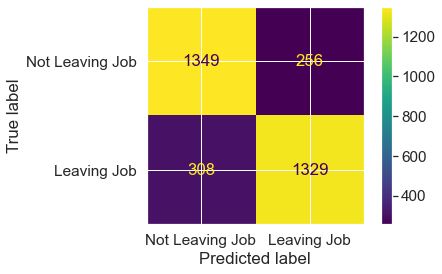

In [111]:
from sklearn.ensemble import RandomForestClassifier
if GridSearch == True:
    param_grid = {'n_estimators':[25,50,60],'max_features': [3,4,5], 'max_depth':[5,6,7], 'min_samples_leaf':[8,9,10,11],'random_state':[1,42] } 
    rf = RandomForestClassifier(n_jobs=-1)
    rf_cv1 =  GridSearchCV(rf, param_grid)
    rf_cv1.fit(X_traine, y_traine)
    print(rf_cv1.best_params_)
    rfpre = rf_cv1.predict(X_teste)
    rfcm = confusion_matrix(y_teste,rfpre)
    print("Accuracy score : {:.2f}".format(accuracy_score(rfpre,y_teste)))
    print("Recall score : {:.2f}".format(recall_score(rfpre,y_teste,average='macro',zero_division=True)))
    print("Precision score : {:.2f}".format(precision_score(rfpre,y_teste,zero_division = True)))
    print("F1 score : {:.2f}".format(f1_score(rfpre,y_teste,zero_division=True)))
    dis = ConfusionMatrixDisplay(rfcm,display_labels=["Not Leaving Job","Leaving Job"])
    dis.plot()
    plt.show()

### DecisionTreeClassifier

{'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 11, 'random_state': 42}
Accuracy score : 0.79
Recall score : 0.80
Precision score : 0.72
F1 score : 0.78


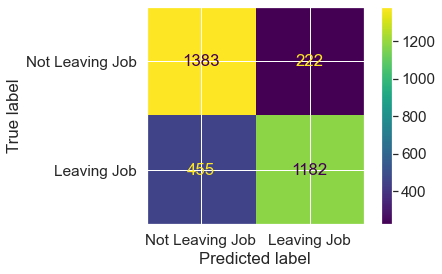

In [47]:
from sklearn.tree import DecisionTreeClassifier
if GridSearch == True:
    param_grid = {'max_features': [3,4,5], 'max_depth':[5,6,7], 'min_samples_leaf':[8,9,10,11],'random_state':[1,42] } 
    dt = DecisionTreeClassifier()
    dt_cv =  GridSearchCV(dt, param_grid)
    dt_cv.fit(X_traine, y_traine)
    print(dt_cv.best_params_)
    dtpre = dt_cv.predict(X_teste)
    dtcm = confusion_matrix(y_teste,dtpre)
    print("Accuracy score : {:.2f}".format(accuracy_score(dtpre,y_teste)))
    print("Recall score : {:.2f}".format(recall_score(dtpre,y_teste,average='macro',zero_division=True)))
    print("Precision score : {:.2f}".format(precision_score(dtpre,y_teste,zero_division = True)))
    print("F1 score : {:.2f}".format(f1_score(dtpre,y_teste,zero_division=True)))
    dis = ConfusionMatrixDisplay(dtcm,display_labels=["Not Leaving Job","Leaving Job"])
    dis.plot()
    plt.show()

### Neural Networks

In [48]:
import keras
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import  ThresholdedReLU

In [49]:
norm = tf.keras.layers.LayerNormalization(
    epsilon=0.001,
    center=True,
    scale=True
)
metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.AUC(name='auc'),
]

In [50]:
model=Sequential()
model.add(norm)
model.add(ThresholdedReLU(theta=10)) # Theta is a threshold which determines the output result of a particular neuron.
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_traine, y_traine,epochs=10)

loss, accuracy  = model.evaluate(X_teste, y_teste, verbose=False)
print('loss: ', loss)
print('accuracy: ', accuracy)

### 17. Write any one classification algorithm without using scikit-learn and train on the final data. (10 points)

In [63]:
import math
from collections import Counter

In [64]:
X_trainb.index=range(len(X_trainb))
y_trainb.index=range(len(y_trainb))
X_testb.index=range(len(X_testb))
y_testb.index=range(len(y_testb))

In [65]:
# KNN numpy implemenation
def neighbors_distance(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        eDistance=0
        for j in range(len(X_train.columns)):   
                eDistance+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        distance.append((eDistance,i,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance


def knn_predict(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(neighbors_distance(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        majority={}
        for j in i:
            if j[-1] in majority.keys():
                majority[j[-1]]=majority[j[-1]]+1
            else:
                majority[j[-1]]=1
        responses.append(sorted(majority,key=majority.get,reverse=True)[0])
    return responses


def knn_predict_numeric(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(neighbors_distance(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        mean=0
        for j in i:
            mean+=j[-1]
        mean=mean/K
        responses.append(mean)
    return responses

def accuracy_category(actual,predicted):
    correct=0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            correct+=1
    return round((correct/len(actual))*100,2)

def accuracy_numerical(actual,predicted):
    error=0
    for i in range(len(predicted)):
        error+=pow((actual[i]-predicted[i]),2)
    error=error/len(predicted)-1
    return 100-error

In [144]:
dataset = load_iris()
df_features = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df_target = pd.DataFrame(dataset.target, columns = ['target'])
iris_data = df_features.join(df_target)
X_train1, X_test1, y_train1, y_test1 = train_test_split(iris_data.drop(["target"],axis=1),iris_data["target"], test_size = 0.25)



In [145]:
#normalize the data
scaler1 =  MinMaxScaler()
scaler1.fit(X_train1)
X_train_scaled1 = scaler1.transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

In [146]:
output=knn_predict(X_train1,y_train1,X_test1,20)

In [147]:
print('accuracy: ',accuracy(y_test1,output))

accuracy:  1.0


### 18. Submit the test predictions using your model from question 14 to the Kaggle competition.
(Note: Actual ranking would be based on a private leader board data (40% of the test
data), the live ranking is given only using the public leader board data (60% of the test
data)) (9 points)

Submitted

### 19. Create a detailed report of the lab. (10 points)

Submitted seperately in a pdf

### 20. Give your comments on how you found the lab tasks. (0 points)

Methodical and helped understand how to implement machine learning algorithms.